In [1]:
using Flux, Flux.Data.MNIST, Statistics, Random, Plots
using Flux: onehotbatch, onecold, crossentropy
Random.seed!(0)

epochs = 200
eta = 1e-5
batchSize = 10
trainRange, validateRange = 1:1000, 1001:1500cour

function minibatch(x, y, indexRange)
    xBatch = Array{Float32}(undef, size(x[1])..., 1, length(indexRange))
    for i in 1:length(indexRange)
        xBatch[:, :, :, i] = Float32.(x[indexRange[i]])
    end
    return (xBatch, onehotbatch(y[indexRange], 0:9))
end

trainLabels = MNIST.labels()[trainRange]
trainImgs = MNIST.images()[trainRange]
mbIdxs = Iterators.partition(1:length(trainImgs), batchSize)
trainSet = [minibatch(trainImgs, trainLabels, bi) for bi in mbIdxs]

validateLabels = MNIST.labels()[validateRange]
validateImgs = MNIST.images()[validateRange]
validateSet = minibatch(validateImgs, validateLabels, 1:length(validateImgs))

model = Chain(  flatten, Dense(784,400,relu),
                Dense(400, 200, relu),
                Dense(200, 100, relu), 
                Dense(100, 50, relu), 
                Dense(50, 10), softmax)

opt = ADAM(eta)
loss_path = []
valid_error_path = []
error_perf(x, y, model) = 1 - mean(onecold(model(x)) .== onecold(y))
loss(x, y, model) = crossentropy(model(x), y)

model(trainSet[1][1])
for _ in 1:epochs
    Flux.train!((x,y)->loss(x,y,model), params(model), trainSet, opt)
    push!(valid_error_path, error_perf(validateSet..., model))
    push!(loss_path, mean([loss(s...,model) for s in trainSet]))
    print(".")
end

........................................................................................................................................................................................................

In [2]:
number_of_params = 784*400 + 400 + 400*200 +200 + 200*100 +100 + 100*50 + 50 + 50*10 +10

419860

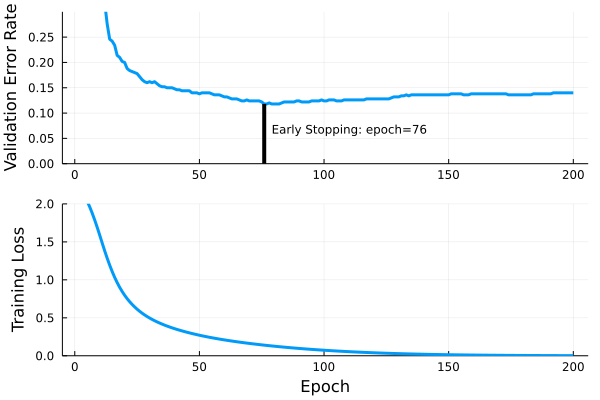

In [3]:
best_err, best_epoch = findmin(valid_error_path)
p1 = plot(valid_error_path,label = false,
        ylim=(0.0,0.3), ylabel = "Validation Error Rate",lw=3)
plot!([best_epoch,best_epoch],[0,best_err],c=:black,label=false,lw=4)
annotate!(best_epoch+65, best_err-0.05, text("Early Stopping: epoch=$best_epoch", :black, :right, 8))
p2 = plot(loss_path,label = false,
        ylim=(0.0,2), xlabel="Epoch", ylabel = "Training Loss",lw=3)
plot(p1,p2,layout=(2,1))

In [4]:
savefig("~/Dropbox/MathEngDeepLearningBook/LaTeXBook/figures/chapter_4_figures/mnist_train_path.pdf")